# Aprendizaje automático:
* Aprendizaje supervisado
  * Regresión
  * Clasificación
* Aprendizaje no supervisado

Aprendizaje supervisado: Algoritmos de clasificación  
(En todos estos ejemplos se están usando los mismos datos para entrenamiento y testeo)

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np


In [ ]:
# Importamos el dataset IRIS del paquete de sklearn, separado
# en dos variables: la de input (x) y la de salida (y)
# Se tienen que usar datos de x para predecir y

data_input = datasets.load_iris().data
data_output = datasets.load_iris().target


In [ ]:
type(data_input)

numpy.ndarray

In [ ]:
# Como es de tipo ndarray lo pasamos a dataframe de pandas

In [ ]:
print(datasets.load_iris().feature_names)
# Importamos las columnas que contienen las variables explicativas a
# un data frame y la variable a predecir en otro
df_input = pd.DataFrame(data_input, columns=datasets.load_iris().feature_names)
df_output = pd.DataFrame(data_output, columns=["Species"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# existen 150 observaciones, por lo que el primer df será de 150*4
# y el segundo será de 150*1
print(df_input)
print(df_output)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     Species
0          0
1          0
2

In [ ]:
# axis = 1 para concatener las columnas
df = pd.concat([df_input, df_output], axis=1)
df
# Tenemos de resultado de concatenar un tamaño de 150*5

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Seleccionamos un subdataframe que contenga las columnas con índice de
# 0 a 4, es decir, las explicativas
# Seleccionamos otro subdataframe con la variable a explicar
x = df.iloc[:, 0:4] # Seleccionar del 0 al 3 (0, 1, 2, 3)
y = df.loc[:, "Species"] #df.iloc[:, 4]


## Regresión Logística

In [ ]:
# Species puede tomar 3 valores (0, 1, 2)
# Por lo que se calcularán 3 modelos con las probabilidades de cada uno

In [ ]:
# Importamos el modelo de regresión logística de
# los modelos lineales que tiene sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creando el modelo
lr = LogisticRegression(penalty="none", fit_intercept=True, random_state=123)
type(lr)


sklearn.linear_model._logistic.LogisticRegression

In [ ]:
# Entrenando el modelo
# (Ajustando los parámetros a los que más se acomoden a 
# los datos de entrenamiento)
lr.fit(x, y)

LogisticRegression(penalty='none', random_state=123)

In [ ]:
# Comprobando el accuracy (precisión)
lr.score(x, y)

0.9866666666666667

In [ ]:
print(lr.intercept_)
print(lr.coef_)

[  3.97751891  19.33028473 -23.30780364]
[[  7.35275467  20.39784579 -30.26354695 -14.14340745]
 [ -2.44378438  -6.85846875  10.41707166  -2.07137781]
 [ -4.90897029 -13.53937704  19.84647528  16.21478526]]


## Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# criterio puede ser gini o entropia
# mucha profundidad causa ovrefitting (entre 3 a 5)
# cada nodo debe terminar con por lo menos 1% del total de datos

dt = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=123, min_samples_leaf=0.01)


In [ ]:
dt.fit(x, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.01, random_state=123)

In [ ]:
dt.score(x, y)

0.9733333333333334

## k vecinos más cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x, y)

KNeighborsClassifier()

In [ ]:
knn.score(x, y)

0.9666666666666667

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(x, y)

GaussianNB()

In [ ]:
nb.score(x, y)

0.96

## Máquinas de soporte vectorial

In [ ]:
from sklearn.svm import SVC

In [ ]:
# kernel: {"linear", "poly", "rbf", "sigmoid"}
svc = SVC(kernel="poly")

In [ ]:
svc.fit(x, y)

SVC(kernel='poly')

In [ ]:
svc.score(x, y)

0.9733333333333334

## Bosques aleatorios  
Es un remuestro del árbol de decisión (árbol de decisión + bootstrap)

In [ ]:
# Importar la clase
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Crear un modelo como instancia de la clase
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=123)

In [ ]:
# Entrenar el modelo
rf.fit(x, y)

RandomForestClassifier(max_depth=5, random_state=123)

In [ ]:
# Probar accuracy
rf.score(x, y)

1.0

## Potenciación del gradiente (Gradient Boosting)  
Es un árbol de decisión + un proceso de reducción de errores  
Es uno de los algoritmos más potentes del machine learning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
xg = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=123)

In [ ]:
xg.fit(x, y)

GradientBoostingClassifier(random_state=123)

In [ ]:
xg.score(x, y)

1.0

## Comparación de resultados


In [ ]:
l_models = ["Logistic", "Decision Tree", "kNN", "Naive Bayes",
            "SVM", "Random Forest", "Gradient Boosting"]
l_metric = [lr.score(x, y), dt.score(x, y), knn.score(x, y),
            nb.score(x, y), svc.score(x, y), rf.score(x, y),
            xg.score(x, y)]


In [ ]:
list_tuples = list(zip(l_models, l_metric))

In [ ]:
df_metricas = pd.DataFrame(list_tuples, columns=["Modelo", "Accuracy"])

In [ ]:
df_metricas

,Modelo,Accuracy
0,Logistic,0.986667
1,Decision Tree,0.973333
2,kNN,0.966667
3,Naive Bayes,0.960000
4,SVM,0.973333
5,Random Forest,1.000000
6,Gradient Boosting,1.000000


In [ ]:
# El modelo a aplicar es elegido de entre los que son mejores
# (tienen más precisión)
# SVM, Random Forest, Gradient Boosting:
# Son computacionalmente costosos (se demoran más en procesar)
# Son díficiles de interpretar

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 6)

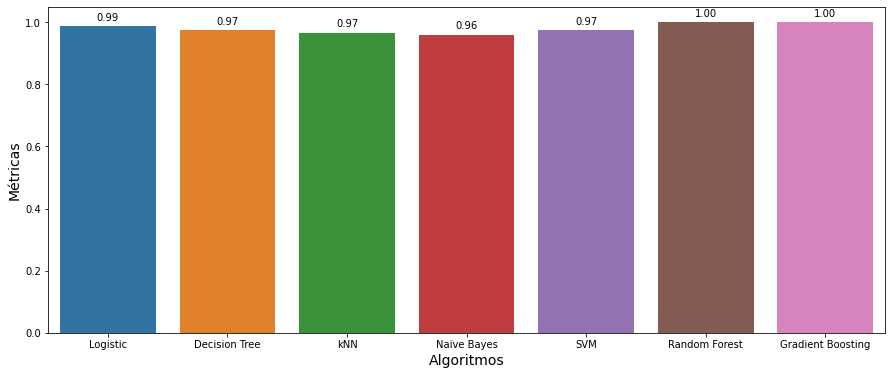

In [ ]:
splot = sns.barplot(x="Modelo", y="Accuracy", data=df_metricas)
for p in splot.patches:
  splot.annotate(format(p.get_height(), ".2f"),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center",
                 xytext=(0, 9),
                 textcoords = "offset points")
plt.xlabel("Algoritmos", size=14)
plt.ylabel("Métricas", size=14)
plt.show()